<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Filter" data-toc-modified-id="Filter-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Filter</a></span><ul class="toc-item"><li><span><a href="#Samples-with-profiling-data" data-toc-modified-id="Samples-with-profiling-data-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Samples with profiling data</a></span></li><li><span><a href="#Samples-per-subject" data-toc-modified-id="Samples-per-subject-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Samples per subject</a></span></li><li><span><a href="#Subset-samples" data-toc-modified-id="Subset-samples-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Subset samples</a></span></li><li><span><a href="#Filtering-studies-with-low-numbers-of-samples" data-toc-modified-id="Filtering-studies-with-low-numbers-of-samples-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Filtering studies with low numbers of samples</a></span></li></ul></li></ul></li><li><span><a href="#Metadata-summary" data-toc-modified-id="Metadata-summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#writing-table" data-toc-modified-id="writing-table-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>writing table</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bracken-data-summary" data-toc-modified-id="Bracken-data-summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bracken data summary</a></span><ul class="toc-item"><li><span><a href="#%-reads-classified" data-toc-modified-id="%-reads-classified-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>% reads classified</a></span></li><li><span><a href="#Bracken-counts" data-toc-modified-id="Bracken-counts-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bracken counts</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Writing-data" data-toc-modified-id="Writing-data-6.3.0.1"><span class="toc-item-num">6.3.0.1&nbsp;&nbsp;</span>Writing data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summary of final dataset metadata

# Var

In [50]:
# base directory
base_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
# output directory
out_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'
# metadata
metadata_file = file.path(base_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_f.tsv')

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt.qs'
profile_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP/'

# params
threads = 8

# Init

In [38]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [39]:
df.dims()
set.seed(49392)
setDTthreads(threads)

# Load

In [40]:
meta = Fread(metadata_file) %>%
    mutate.(Sample = gsub('-', '.', Sample)) %>%
    filter.(number_reads >= 5e5)
meta$subjectID %>% unique_n('subjects')
meta

Warning message in require_bit64_if_needed(ans):
“Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again.”


No. of unique subjects: 3189 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZellerG_2014,CCIS82944710ST.20.0,FR-730,stool,NA,control,healthy,38,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZellerG_2014,CCIS93040568ST.20.0,FR-682,stool,NA,control,healthy,65,adult,male,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [48]:
# bracken
brk = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = gsub(' ', '_', name))
brk

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


## Filter

### Samples with profiling data

In [44]:
overlap(brk$Sample, meta$Sample)
meta_f = meta %>%
    semi_join.(brk, c('Sample'))
meta_f$Sample %>% unique_n('Samples')
meta_f$subjectID %>% unique_n('Subjects')
meta_f

intersect(x,y): 3348 
setdiff(x,y): 9 
setdiff(y,x): 234 
union(x,y): 3591 
No. of unique Samples: 3348 
No. of unique Subjects: 2955 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,NA,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,NA,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


### Samples per subject

In [7]:
# samples per individual
meta_s = meta_f %>%
    summarize.(n = n.(),
               .by = c(subjectID, study_condition, disease, age, 
                       westernized, dataset_name)) 
meta_s$n %>% summary_x('samples per subject')
meta_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
samples per subject,1,1,1,1.123113,1,6,2.032,0.829


subjectID,study_condition,disease,age,westernized,dataset_name,n
<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<int>
MV_FEM1,control,healthy,NA,TRUE,AsnicarF_2017,1
MV_FEM2,control,healthy,NA,TRUE,AsnicarF_2017,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_45,control,healthy,NA,TRUE,ZeeviD_2015,1
PNP_Validation_46,control,healthy,NA,TRUE,ZeeviD_2015,1


In [8]:
# which subjects have multiple samples?
meta_sf = meta_s %>% 
    filter.(n > 1)
meta_sf

subjectID,study_condition,disease,age,westernized,dataset_name,n
<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<int>
MV_FEM4,control,healthy,NA,TRUE,AsnicarF_2017,2
MV_FEM5,control,healthy,NA,TRUE,AsnicarF_2017,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
P7C,control,healthy,23,TRUE,RaymondF_2016,3
P8C,control,healthy,26,TRUE,RaymondF_2016,3


In [9]:
# from whyich studies?
meta_sf$dataset_name %>% table

.
        AsnicarF_2017 Bengtsson-PalmeJ_2015         CosteaPI_2017 
                    2                    34                     1 
       HansenLBS_2018  Heitz-BuschartA_2016              HMP_2012 
                   52                     4                    44 
            LiSS_2016           LouisS_2016        PehrssonE_2016 
                    1                    16                    32 
        RaymondF_2016 
                    6 

### Subset samples

In [10]:
meta_ff = meta_f %>%
    mutate.(X = sample(1:length(dataset_name), length(dataset_name)),
            .by=c(subjectID)) %>%
    filter.(X == 1) %>%
    select.(-X)
meta_ff$Sample %>% unique_n('Samples')
meta_ff$subjectID %>% unique_n('Subjects')
meta_ff

No. of unique Samples: 2955 
No. of unique Subjects: 2955 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,NA,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,NA,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


### Filtering studies with low numbers of samples

In [30]:
meta_ff = meta_ff %>%
    mutate.(samps_per_study = n.(),
            .by=c(dataset_name)) %>%
    filter.(samps_per_study >= 10) 

meta_ff$Sample %>% unique_n('Samples')
meta_ff$subjectID %>% unique_n('Subjects')
meta_ff$dataset_name %>% unique_n('Datasets')
meta_ff$samps_per_study %>% summary_x()
meta_ff

No. of unique Samples: 2943 
No. of unique Subjects: 2943 
No. of unique Datasets: 30 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,16,88,196,228.2178,405,446,169.941,69.378


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,TRAVELRES1_2,stool,no,control,healthy,25,adult,female,⋯,NA,NA,NA,NA,NA,NA,1,1,TRUE,36
Bengtsson-PalmeJ_2015,TRAVELRES11,TRAVELRES11_12,stool,no,control,healthy,22,adult,female,⋯,NA,NA,NA,NA,NA,NA,1,1,TRUE,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,NA,⋯,NA,NA,NA,NA,NA,NA,1,1,TRUE,446
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,NA,⋯,NA,NA,NA,NA,NA,NA,1,1,TRUE,446


# Metadata summary

In [34]:
# meta vars
meta_ff$gender %>% table
meta_ff$age %>% summary
meta_ff$BMI %>% summary

.
female   male 
  1102    723 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  19.00   25.00   43.00   44.49   62.00  107.00    1201 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.79   21.05   23.05   23.88   25.77   65.75    1887 

File written: /ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/ipynb/01_data_explore/.figures/f482a1b03fc32b7e8311f641b4054586.RDS 


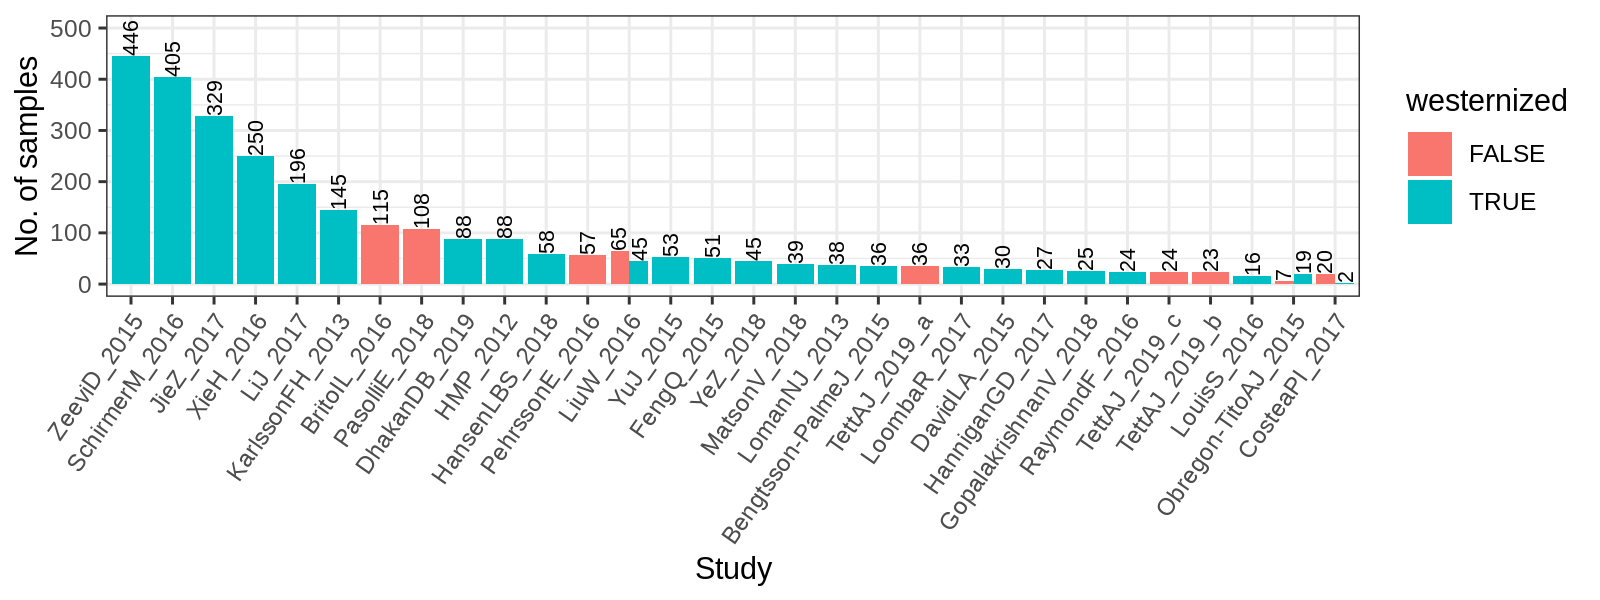

In [29]:
# samples per dataset
p = meta_ff %>%
    summarize.(N = n.(),
               .by=c(dataset_name, westernized)) %>%
    mutate.(dataset_name = dataset_name %>% reorder(-N)) %>%
    ggplot(aes(dataset_name, N, fill=westernized)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=N), size=2.7, angle=90, hjust=0,
              position = position_dodge(width = 1)) +
    scale_y_continuous(limits=c(0, 500)) +
    labs(x='Study', y='No. of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
p.dims(8,3)
Plot(p)

#### writing table

In [35]:
metadata_file = file.path(base_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')
write_table(meta_ff, metadata_file)

File written: /ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/metadata/Filtered_CurMetDat_ff.tsv 


# Bracken data summary

## % reads classified

In [61]:
# listing files
brk_uncls_files = list_files(profile_dir, 'all-combined_kraken-unclassified.tsv')
brk_uncls_files = brk_uncls_files[!grepl('(34_HuBif|36_EcoEvo)', brk_uncls_files)]
brk_uncls_files %>% length
brk_uncls_files %>% head(n=3)

[1] 33

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//01_CosteaPI_2017/kraken/all-combined_kraken-unclassified.tsv"      
[2] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//02_Obregon-TitoAJ_2015/kraken/all-combined_kraken-unclassified.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//03_PasolliE_2018/kraken/all-combined_kraken-unclassified.tsv"

In [67]:
# reading in tables
brk_uncls = brk_uncls_files %>%
    files_to_list(-2) %>%
    lapply(Fread) %>%
    data.table::rbindlist(use.names=TRUE, idcol='Dataset') %>%
    mutate.(Dataset = gsub('^[0-9]+_', '', Dataset)) %>%
    mutate.(sample = gsub('-', '.', sample)) 
brk_uncls  %>% unique_n('Samples', sample)
brk_uncls

No. of unique Samples: 3360 


Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
CosteaPI_2017,halbarad.11.0.0,18.60,185981,185981,U,0,unclassified
CosteaPI_2017,scavenger.11.60.0,10.99,109942,109942,U,0,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,SZAXPI017591.140,28.00,279999,279999,U,0,unclassified
YuJ_2015,SZAXPI017592.142,21.41,214099,214099,U,0,unclassified


In [68]:
# filtering
overlap(brk_uncls$sample, meta_ff$Sample)
brk_uncls = brk_uncls %>%
    inner_join.(meta_ff, c('sample'='Sample')) %>%
    mutate.(perc_reads_cls = 100 - percent_reads) 
brk_uncls$sample %>% unique_n('Samples')
brk_uncls

intersect(x,y): 2943 
setdiff(x,y): 417 
setdiff(y,x): 0 
union(x,y): 3360 
No. of unique Samples: 2943 


Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,dataset_name,subjectID,⋯,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study,perc_reads_cls
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>,<dbl>
Bengtsson-PalmeJ_2015,TRAVELRES1,31.23,312348,312348,U,0,unclassified,Bengtsson-PalmeJ_2015,TRAVELRES1_2,⋯,NA,NA,NA,NA,NA,1,1,TRUE,36,68.77
Bengtsson-PalmeJ_2015,TRAVELRES11,25.83,258328,258328,U,0,unclassified,Bengtsson-PalmeJ_2015,TRAVELRES11_12,⋯,NA,NA,NA,NA,NA,1,1,TRUE,36,74.17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,19.22,192152,192152,U,0,unclassified,ZeeviD_2015,PNP_Validation_45,⋯,NA,NA,NA,NA,NA,1,1,TRUE,446,80.78
ZeeviD_2015,PNP_Validation_46,17.94,179448,179448,U,0,unclassified,ZeeviD_2015,PNP_Validation_46,⋯,NA,NA,NA,NA,NA,1,1,TRUE,446,82.06


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,16.68,75.96,80.68,79.50617,84.675,99.33,28.675,11.707


File written: /ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/ipynb/01_data_explore/.figures/4415654ea705c14f8354aaa6b2edc16f.RDS 


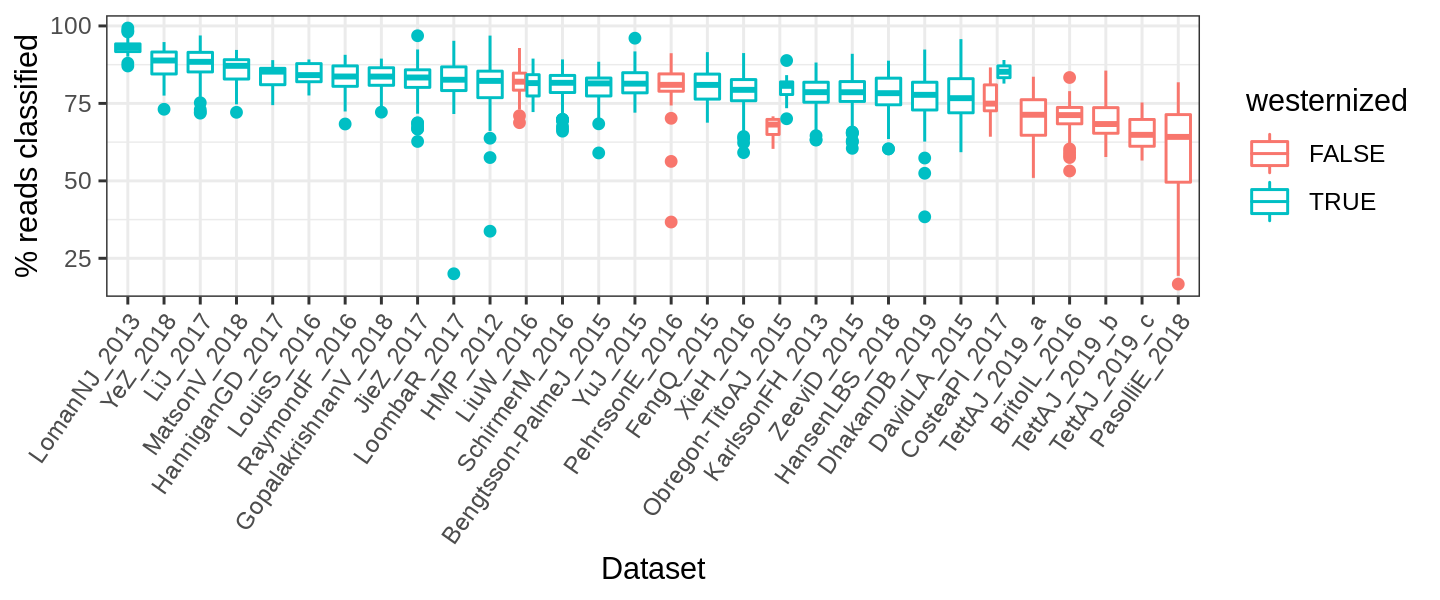

In [71]:
# plotting
brk_uncls$perc_reads_cls %>% summary_x()
p = brk_uncls %>%
    mutate.(mean_reads_cls = median(perc_reads_cls),
            .by=c(Dataset)) %>%
    mutate.(Dataset = Dataset %>% reorder(-mean_reads_cls)) %>%
    ggplot(aes(Dataset, perc_reads_cls, color=westernized)) +
    geom_boxplot() +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(7.2,3)
Plot(p)

## Bracken counts

In [49]:
# filtering
overlap(brk$Sample, meta_ff$Sample)
brk = brk %>%
    semi_join(meta_ff, c('Sample'))
brk$Sample %>% unique_n('Samples')
brk

intersect(x,y): 2943 
setdiff(x,y): 414 
setdiff(y,x): 0 
union(x,y): 3357 
No. of unique Samples: 2943 


dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


## Summary

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0.3809524,1.158301,1.769455,4.634338,4.937063,26.40102,9.903,4.043


File written: /ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/ipynb/01_data_explore/.figures/1dc3f41fe748b65fcaf2b3c09eda4138.RDS 


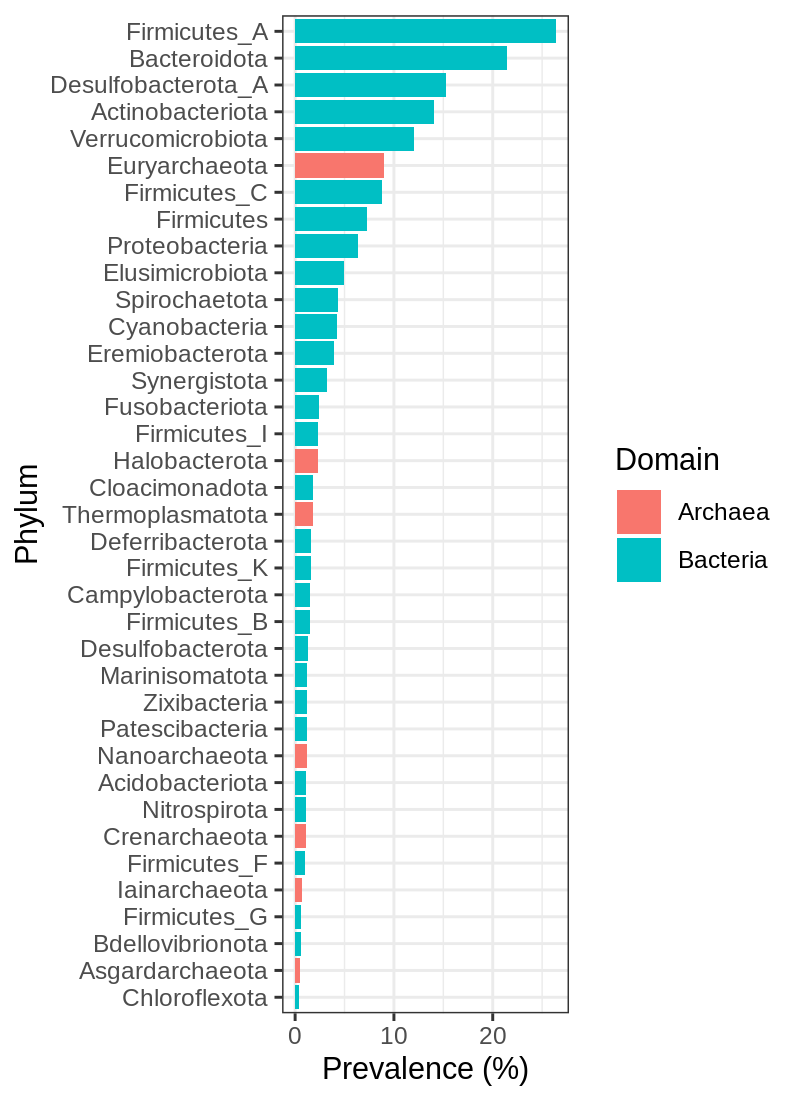

In [77]:
# phylum prevalence
brk_s = brk %>%
    summarize.(prev = sum(Abundance > 1e-5) / length(Abundance) * 100,
               .by=c(Domain, Phylum))
brk_s$prev %>% summary_x

## plotting
p = brk_s %>%
    mutate.(Phylum = Phylum %>% reorder(prev)) %>%
    ggplot(aes(Phylum, prev, fill=Domain)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='Prevalence (%)') +
    theme_bw() 

p.dims(4,5.5)
Plot(p)

#### Writing data

In [79]:
F = brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'
qs::qsave(brk, F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs 


# sessionInfo

In [36]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse2/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.10 tidytable_0.6.4    data.table_1.14.0  ggplot2_3.3.5     
[5] tidyr_1.1.3        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7          pillar_1.6.2        compiler_4.1.1     
 [4] base64enc_0.1-3     tools_4.1.1         qs_0.25.1